In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Merge 12 months of sales data into a single csv file 

In [3]:
files =[file for file in os.listdir("/content")]
for file in files:
    print(file)

.config
Sales_July_2019.csv
Sales_October_2019.csv
Sales_March_2019.csv
Sales_June_2019.csv
Sales_November_2019.csv
Sales_September_2019.csv
Sales_May_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
sample_data


In [6]:
path = "/content/"

#blank dataframe
all_data = pd.DataFrame()

for file in files:
    current_df = pd.read_csv(f'{path}{file}')
    all_data = pd.concat([all_data, current_df])
    
all_data.shape

(121616, 6)

## Convert it into dataset

In [ ]:
all_data.to_csv('/content/all_data.csv', index=False)

## Data cleaning and formatting

In [7]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [8]:
all_data.isnull().sum()

Order ID            352
Product             352
Quantity Ordered    352
Price Each          352
Order Date          352
Purchase Address    352
dtype: int64

In [9]:
all_data = all_data.dropna(how='all')
all_data.shape

(121264, 6)

## What is the best month for sale?

In [10]:
'04/19/19 08:46'.split('/')[0]

'04'

In [11]:
def month(x):
    return x.split('/')[0]

### Add month col

In [12]:
all_data['Month'] = all_data['Order Date'].apply(month)

In [13]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [27]:
all_data['Month'] = all_data['Month'].astype(int)

In [28]:
all_data['Month'].unique()

array([ 7,  8, 10, 11,  3,  4,  6, 12,  9,  5,  2])

In [19]:
filter = all_data['Month'] == 'Order Date'
len(all_data[~filter])

121034

In [21]:
all_data = all_data[~filter]
all_data.shape
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301",07
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101",07
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",07
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",07
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",07


In [22]:
all_data['Month'] = all_data['Month'].astype(int)
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [23]:
all_data['Price Each'] = all_data['Price Each'].astype(float)
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95


In [26]:
all_data.groupby('Month')['sales'].sum()

Month
2     2200273.74
3     2807100.38
4        5170.42
5     3142047.46
6     2577802.26
7     2647775.76
8        2152.31
9     2095463.39
10    3736726.88
11    3199603.20
12       2816.51
Name: sales, dtype: float64

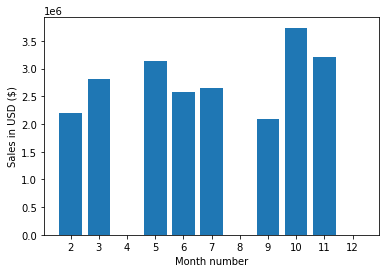

In [30]:
months = range(2,13)  # Some issues qith january, August, and December data
plt.bar(months, all_data.groupby('Month')['sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number') 
plt.show()

##### Which city has max order

In [32]:
'917 1st St, Dallas, TX 75001'.split(',')[1]

' Dallas'

In [33]:
def city(x):
    return x.split(',')[1]

In [35]:
all_data['city'] = all_data['Purchase Address'].apply(city)

In [36]:
all_data.groupby('city')['city'].count()

city
 Atlanta           9694
 Austin            6406
 Boston           13025
 Dallas            9712
 Los Angeles      19289
 New York City    16105
 Portland          8135
 San Francisco    29087
 Seattle           9581
Name: city, dtype: int64

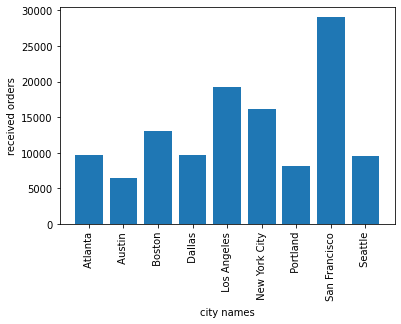

In [37]:
plt.bar(all_data.groupby('city')['city'].count().index,all_data.groupby('city')['city'].count())
plt.xticks(rotation='vertical')
plt.ylabel('received orders')
plt.xlabel('city names')
plt.show()

##### What time should we display advertisements to maximise for product purchase?

In [38]:
all_data['Order Date'][0].dtype

dtype('O')

In [39]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour

keys=[]
hour=[]
for key,hour_df in all_data.groupby('Hour'):
    keys.append(key)
    hour.append(len(hour_df))

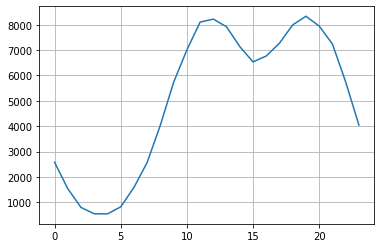

In [40]:
plt.grid()
plt.plot(keys, hour)

##### between 12pm and 7pm is probably the best time to advertise to maximise product purchase

#### What product sold the most? &  Why?

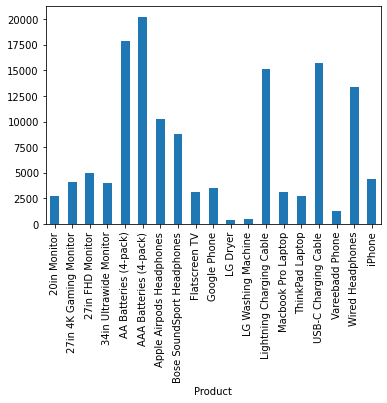

In [41]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [42]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

[Text(0, 0, '20in Monitor'),
 Text(0, 0, '27in 4K Gaming Monitor'),
 Text(0, 0, '27in FHD Monitor'),
 Text(0, 0, '34in Ultrawide Monitor'),
 Text(0, 0, 'AA Batteries (4-pack)'),
 Text(0, 0, 'AAA Batteries (4-pack)'),
 Text(0, 0, 'Apple Airpods Headphones'),
 Text(0, 0, 'Bose SoundSport Headphones'),
 Text(0, 0, 'Flatscreen TV'),
 Text(0, 0, 'Google Phone'),
 Text(0, 0, 'LG Dryer'),
 Text(0, 0, 'LG Washing Machine'),
 Text(0, 0, 'Lightning Charging Cable'),
 Text(0, 0, 'Macbook Pro Laptop'),
 Text(0, 0, 'ThinkPad Laptop'),
 Text(0, 0, 'USB-C Charging Cable'),
 Text(0, 0, 'Vareebadd Phone'),
 Text(0, 0, 'Wired Headphones'),
 Text(0, 0, 'iPhone')]

<Figure size 2880x1728 with 0 Axes>

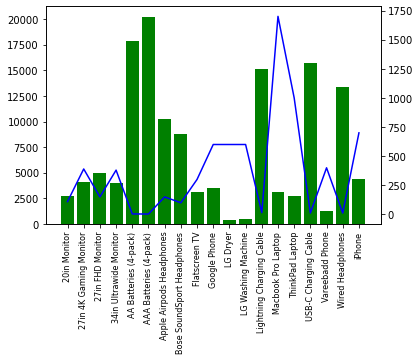

In [43]:
products = all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity = all_data.groupby('Product')['Quantity Ordered'].sum()
prices = all_data.groupby('Product')['Price Each'].mean()

plt.figure(figsize=(40,24))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)

##### The top selling product is 'AAA Batteries'. The top selling products seem to have a correlation with the price of the product. The cheaper the product higher the quantity ordered and vice versa.

In [44]:
all_data.shape

(121034, 10)

##### What products are most often sold together?

#### note: keep orders that have same order Id,are sold mostly together

In [45]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour
118,223028,Vareebadd Phone,1,400.00,07/07/19 10:21,"969 10th St, San Francisco, CA 94016",7,400.00,San Francisco,10
119,223028,USB-C Charging Cable,2,11.95,07/07/19 10:21,"969 10th St, San Francisco, CA 94016",7,23.90,San Francisco,10
120,223028,Wired Headphones,1,11.99,07/07/19 10:21,"969 10th St, San Francisco, CA 94016",7,11.99,San Francisco,10
140,223048,Vareebadd Phone,1,400.00,07/21/19 17:19,"168 8th St, Portland, OR 97035",7,400.00,Portland,17
141,223048,USB-C Charging Cable,2,11.95,07/21/19 17:19,"168 8th St, Portland, OR 97035",7,23.90,Portland,17
188,223095,Apple Airpods Headphones,1,150.00,07/03/19 13:42,"876 Cedar St, Los Angeles, CA 90001",7,150.00,Los Angeles,13
189,223095,AA Batteries (4-pack),1,3.84,07/03/19 13:42,"876 Cedar St, Los Angeles, CA 90001",7,3.84,Los Angeles,13
201,223106,Wired Headphones,1,11.99,07/14/19 14:30,"630 2nd St, San Francisco, CA 94016",7,11.99,San Francisco,14
202,223106,Vareebadd Phone,1,400.00,07/14/19 14:30,"630 2nd St, San Francisco, CA 94016",7,400.00,San Francisco,14
213,223117,Google Phone,1,600.00,07/11/19 23:25,"184 Spruce St, Atlanta, GA 30301",7,600.00,Atlanta,23


In [48]:
#create grouped col 
df.loc[:, 'Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour,Grouped
118,223028,Vareebadd Phone,1,400.00,07/07/19 10:21,"969 10th St, San Francisco, CA 94016",7,400.00,San Francisco,10,"Vareebadd Phone,USB-C Charging Cable,Wired Hea..."
119,223028,USB-C Charging Cable,2,11.95,07/07/19 10:21,"969 10th St, San Francisco, CA 94016",7,23.90,San Francisco,10,"Vareebadd Phone,USB-C Charging Cable,Wired Hea..."
120,223028,Wired Headphones,1,11.99,07/07/19 10:21,"969 10th St, San Francisco, CA 94016",7,11.99,San Francisco,10,"Vareebadd Phone,USB-C Charging Cable,Wired Hea..."
140,223048,Vareebadd Phone,1,400.00,07/21/19 17:19,"168 8th St, Portland, OR 97035",7,400.00,Portland,17,"Vareebadd Phone,USB-C Charging Cable"
141,223048,USB-C Charging Cable,2,11.95,07/21/19 17:19,"168 8th St, Portland, OR 97035",7,23.90,Portland,17,"Vareebadd Phone,USB-C Charging Cable"


In [49]:
df.shape

(9529, 11)

In [50]:
#lets drop out all duplicate Order ID
df2 = df.drop_duplicates(subset=['Order ID'])

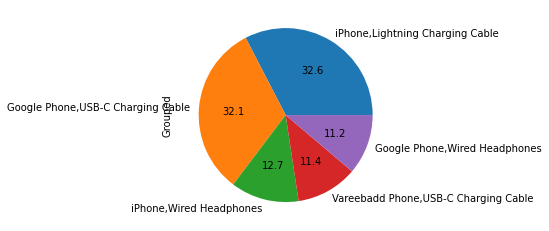

In [56]:
df2['Grouped'].value_counts()[0:5].plot.pie(autopct='%.1f')

In [57]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [58]:
values=df2['Grouped'].value_counts()[0:5]
labels=df['Grouped'].value_counts()[0:5].index

trace=go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=25),
              pull=[0, 0, 0,0.2, 0]
               )

iplot([trace])